### Analíse de dados de estudadntes serem admitidos em uma faculdade

400 linhas x 8 colunas, chande of admit classe que vamos prever

In [34]:
import pandas as pd
!pip install keras

from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [35]:
# Check is Link to Drive is OK
google = !if [ -d 'drive/' ]; then echo "1" ; else echo "0"; fi
if (google[0] == '0' ):
  from google.colab import drive
  drive.mount('/content/drive/')
!if [ -d 'drive/' ]; then echo "Connection to Google drive successful" ; else echo "Error to connect to Google drive"; fi
!ls "/content/drive/MyDrive/redeNeuralPandas"

Connection to Google drive successful
admission_dataset.csv  redeneural.jpeg	RedeNeuralPandas.ipynb


In [44]:
df = pd.read_csv('/content/drive/MyDrive/redeNeuralPandas/admission_dataset.csv')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,315,105,3,2.0,2.5,8.48,0,0.75
1,321,112,5,5.0,5.0,9.06,1,0.86
2,327,103,3,4.0,4.0,8.30,1,0.74
3,305,112,3,3.0,3.5,8.65,0,0.71
4,297,96,2,2.5,1.5,7.89,0,0.43
...,...,...,...,...,...,...,...,...
395,320,111,4,4.5,3.5,8.87,1,0.85
396,305,103,2,2.5,3.5,8.13,0,0.59
397,305,107,2,2.5,2.5,8.42,0,0.71
398,320,104,3,3.0,2.5,8.57,1,0.74


In [45]:
# Após carregar o DataFrame
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [46]:
y = df['Chance of Admit '] # coluna chance of admit na variavel y
x = df.drop('Chance of Admit ', axis = 1) #  todas as outras na variavel x, exeto a coluna chance of admit

x_treino, x_teste = x[0:300], x[300:]
y_treino, y_teste = y[0:300], y[300:]
print((x_treino.shape), (x_teste.shape))
print((y_treino.shape), (y_teste.shape))

(300, 7) (100, 7)
(300,) (100,)


In [51]:
# Criando a arquitetura da rede neural:
modelo = Sequential()
# unit=3 quantidade de camadas, activation='relu' função de ativação, imput_dim é a quantidade de parametros ou variaveis preditoras
modelo.add(Dense(units=3, activation='relu', input_dim=x_treino.shape[1]))
# units=1 quantidade de neuronio de saida,
modelo.add(Dense(units=1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


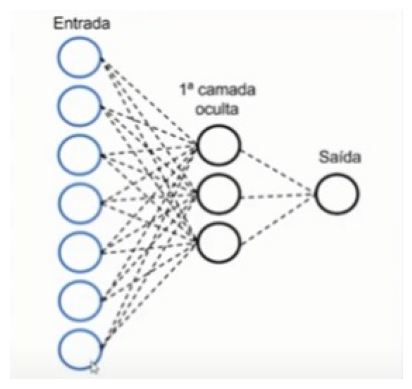

In [48]:
# Caminho para a imagem
img = '/content/drive/MyDrive/redeNeuralPandas/redeneural.jpeg'
# Abrir a imagem usando PIL
from PIL import Image
img = Image.open(img)
# Exibir a imagem
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

# Imagem da rede neural configurada 7 entradas 3 neuronio e 1 saida

In [ ]:
# Treinando a rede neural:
modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
resultado = modelo.fit(x_treino, y_treino, epochs=200, batch_size=32, validation_data=(x_teste, y_teste))

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9488.4697 - mae: 97.3023 - val_loss: 7938.6074 - val_mae: 89.0493
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7400.1924 - mae: 85.9304 - val_loss: 6083.3833 - val_mae: 77.9540
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5640.8398 - mae: 75.0159 - val_loss: 4524.7090 - val_mae: 67.2311
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4164.8418 - mae: 64.4507 - val_loss: 3261.5237 - val_mae: 57.0817
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2974.6331 - mae: 54.4643 - val_loss: 2273.0461 - val_mae: 47.6546
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2057.1970 - mae: 45.2878 - val_loss: 1528.2562 - val_mae: 39.0764
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1373.8253 - mae: 37.0002 - val_loss: 987.1830 - val_mae: 31.4075
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 879.2404 - mae: 29.5971 - val_loss: 611.1650 - val_mae: 24.7133
Ep

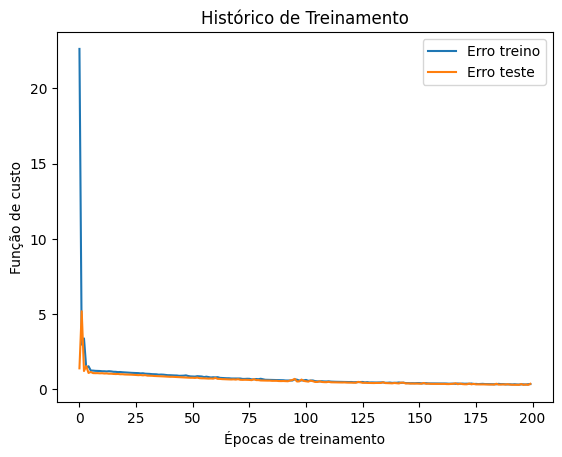

In [50]:
# Plotando gráfico do histórico de treinamento
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()